## 텍스트 분류
 - 텍스트 분류는 말그대로 특정 문장이나 문서를 어떠한 카테고리로 분류하는 문제를 의미합니다. 이 문제는 가장 간단한 자연어 처리 문제로 스팸 메일 분류가 해당 문제의 대표적인 예시이다.

## 자연어 처리 과정
1. Preprocessing
    - 불용어 제거(stopwords removing), 형태소 분석(stemming), 표제어 추출(Lemmatization)
2. Vectorization
    - One-hot Encoding, Count vectorization, Tfidf, Padding
3. Embedding
    - Word2vec, Doc2vec, Glove, Fasttext
4. Modeling
    - GRU, LSTM, Attention

## 적용
    1. 데이터를 불러온 후 기사의 각 문장별로 Konlpy의 함수 중 하나를 활용해서 형태소 분석 진행
    2. 그 후 필요없는 단어들을 불용어로 지정하고 제외
    3. 해당 결과를 sklearn 패키지의 함수중 하나를 이용하여 정수 인코딩으로 변환해주는 Vectorization을 진행
    4. 각 문장별로 벡터화된 문장은 서로 다른 길이를 갖게 됨. 모델을 입력하기 위해 모든 문장 벡터들을 일정한 길이를 가져야 하므로 길이가 긴 문장을 자르고 길이가 짧은 문장은 0으로 채워넣음 (Padding)
    5. 앞서 처리된 문장 벡터들을 특정 차원으로 임베딩 시킴. 딥러닝 모델을 이용할 시 자동으로 임베딩을 진행해주는 층을 추가하면 간단하게 진행 됨. 성능을 높이기 위해서 pre-trained embedding인 word2vec, glove 등을 이용
    6. 훈련을 시키고 테스트를 진행

### 1. Preprocessing
1. 데이터를 불러온 후 각 신문기사들을 눈으로 확인하여 특수문자, 불용어 그리고 문장 구조에 대한 감을 잡는다.
2. 문제의 목적과 분석자의 재량에 따라 불용어를 설정하고 리스트에 저장한다. (이 데이터는 특수 문자와 조사만 제거해도 어느 정도 높은 정확도를 얻을 수 있다.)
3. 불용어 이외의 특수 문자들을 제거한다. (정규표현식을 사용하여 한글과 영어 소문자를 제외한 모든 글자 제거)
4. 형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리한다. 이때 내가 설정한 불용어들을 결과로 반환해주는 형태소 분석기를 사용해야한다. 예를 들어 조사를 불용어로 설정했는데 조사를 분리해주지 못하는 형태소 분석기를 후보에서 제외한다.
5. 형태소 단위의 토큰들을 기반으로 리스트에 저장된 불용어 제거한다.

#### 형태소 분석 (Stemming)
    - 형태소 분석이란 단어나 문장의 언어적 속성을 파악하는 것을 의미한다. 보통 품사의 태깅(PoS)를 통해 이루어지며 한국어 형태소 분석을 위해 Konlpy 패키지에 있는 다양한 함수를 이용해서 진행 할 수 있다.
    - 형태소 분석을 하는 이유는 주로 형태소 단위로 의미있는 단어를 가져가고 싶거나 품사 태깅을 통해 형용사나 명사를 추출하고 싶을 때 많이 이용하게 된다.
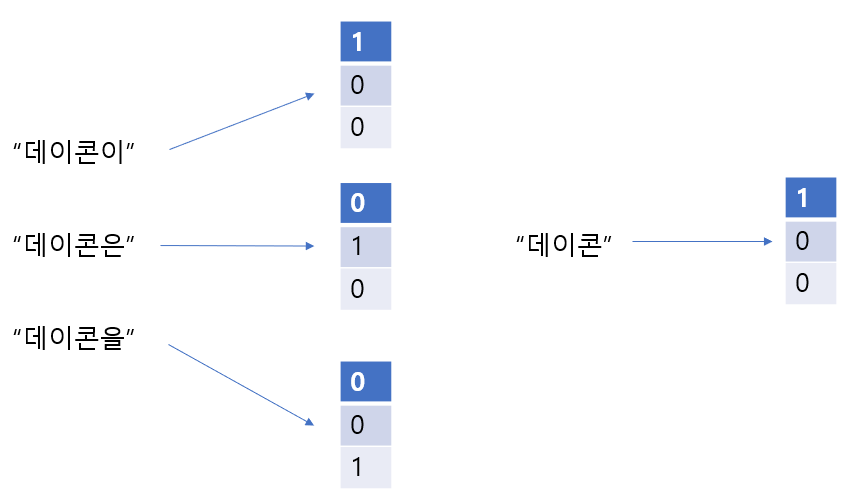
    - 문장을 띄어쓰기 단위로 분류하여 vectorization을 하게 되면 "데이콘"이라는 같은 의미의 토큰 세개가 서로 다은 vector를 갖게 된다. 이렇게 되면 모델이 세 단어를 각각 다른 단어로 이해한다. 하지만 형태소 분석을 통해 "데이콘"이라는 토큰을 추출한다면 앞의 세 단어는 동일한 vector를 갖게되며 모델이 해당 토큰을 더 잘 학습하는데 도움이 된다.
    - 형태소 분석은 어쩌면 모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정이다. 시간이 허락한다면 다양한 형태소 분석기를 사용하여 결과를 비교하는 것을 추천한다.

In [1]:
# 1-1.Kkma()
from konlpy.tag import Kkma
kkma = Kkma()

sentence = "데이콘에서 다양한 대회를 즐기면서 실력있는 데이터 분석가로 성장하세요!!"

print("형태소 단위로 문장 분리:", kkma.morphs(sentence))
print("문장에서 명사 추출:", kkma.nouns(sentence))
print("품사 태킹(PoS):", kkma.pos(sentence))

형태소 단위로 문장 분리: ['데이', '콘', '에서', '다양', '하', 'ㄴ', '대회', '를', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '세요', '!!']
문장에서 명사 추출: ['데이', '데이콘', '콘', '다양', '대회', '실력', '데이터', '분석가', '성장']
품사 태킹(PoS): [('데이', 'NNG'), ('콘', 'NNG'), ('에서', 'JKM'), ('다양', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('대회', 'NNG'), ('를', 'JKO'), ('즐기', 'VV'), ('면서', 'ECE'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETD'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKM'), ('성장', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('!!', 'SW')]


In [2]:
# 1-2. Okt()
from konlpy.tag import Okt
Okt = Okt()

sentence = "데이콘에서 다양한 대회를 즐기면서 실력있는 데이터 분석가로 성장하세요!!"

print("형태소 단위로 문장 분리:", Okt.morphs(sentence))
print("문장에서 명사 추출:", Okt.nouns(sentence))
print("품사 태킹(PoS):", Okt.pos(sentence))

형태소 단위로 문장 분리: ['데', '이콘', '에서', '다양한', '대회', '를', '즐기면서', '실력', '있는', '데이터', '분석', '가로', '성장하세요', '!!']
문장에서 명사 추출: ['데', '이콘', '대회', '실력', '데이터', '분석', '가로']
품사 태킹(PoS): [('데', 'Noun'), ('이콘', 'Noun'), ('에서', 'Josa'), ('다양한', 'Adjective'), ('대회', 'Noun'), ('를', 'Josa'), ('즐기면서', 'Verb'), ('실력', 'Noun'), ('있는', 'Adjective'), ('데이터', 'Noun'), ('분석', 'Noun'), ('가로', 'Noun'), ('성장하세요', 'Adjective'), ('!!', 'Punctuation')]


In [3]:
# 1-3. Mecab()
from konlpy.tag import Mecab
Mecab = Mecab()

sentence = "데이콘에서 다양한 대회를 즐기면서 실력있는 데이터 분석가로 성장하세요!!"

print("형태소 단위로 문장 분리:", Mecab.morphs(sentence))
print("문장에서 명사 추출:", Mecab.nouns(sentence))
print("품사 태깅(PoS):", Mecab.pos(sentence))

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

- Mecab : 속도가 빠르면서 좋은 분석 결과를 보여준다
- Komoran : 댓글과 같이 정제되지 않은 글에 대해서 먼저 사용해보면 좋다 (오탈자를 어느정도 고려해준다)
- Kkma : 분석 시간이 오래걸리기 때문에 잘 이용하지 않게 된다
- Okt : 품사 태깅 결과를 Noun, Verb등 알아보기 쉽게 반환해준다
- khaiii : 카카오에서 가장 최근에 공개한 분석기, 성능이 좋다고 알려지있으며 다양한 실험이 필요하다.

#### 표제어 추출 (Lemmatization)
    - 언어학을 전공하지 않은 사람에게 Lemmatization과 stemming은 큰 차이가 없다고 생각한다. 모두 단어의 본 모습을 찾아주는 과정으로서 Konlpy에서 공개한 형태소 분석기를 이용하면 어느 정도 어간 추출이 가능하다. 형태소 분석(Pos Taggig)을 stemming이라고 표기한 이유도 이와 같다.

In [4]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = "성장했었다."

print("품사 태깅(PoS) : ", kkma.pos(sentence))

품사 태깅(PoS) :  [('성장', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [5]:
sentence = "성장하였었다."

print("품사 태깅(PoS) : ", kkma.pos(sentence))

품사 태깅(PoS) :  [('성장', 'NNG'), ('하', 'XSV'), ('였', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


#### 불용어 제거 (Stopwords removing)
    - 불용어를 간단하게 정의내리면 문장에서 큰 의미가 없다고 생각되는 단어, 글자들 이다. 불용어는 데이터와 문제에 따라 유동적이다.

In [6]:
import re

tokenizer = Okt

def text_preprocessing(text,tokenizer):
    
    stopwords=['을','를','이','가','은','는']
    
    txt = re.sub('[^가-힣a-z]', " ", text) # 영어 소문자와 한글을 제외한 모든 문자 제거
    token = tokenizer.morphs(txt) # okt를 이용한 형태소 분석
    token = [t for t in token if t not in stopwords] # 형태소 분석기를 거쳐 나온 결과들 중 stopwords리스트에 포함되지 않는 토큰만 token이라는 리스트에 반환
    
    return token

In [7]:
ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre = text_preprocessing(ex_text, tokenizer)

In [8]:
print(example_pre)

['이번', '에', '새롭게', '개봉', '한', '영화', '의', '배우', '들', '모두', '훌륭한', '연기력', '과', '아름다운', '목소리', '갖고', '있어']


### 2. Vectorization
- NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것을 말한다. 이 때 벡터로 변환된 고유의 토큰들이 모인 집합을 vocabulary라 하며 vocabulary가 크면 클수록 학습이 오래 걸리게 됩니다. 다양한 벡터화 함수들이 존재하지만 가장 기본적이며 많이 쓰이는 세 가지 소개
- 벡터화하기 전에 형태소 분석기를 사용하여 문장 토큰 분리

In [9]:
from konlpy.tag import Okt
import re

Okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
    sentence = re.sub('[^가-힣a-z]',' ', sentence)
    token = (Okt.morphs(sentence))
    tokens.append(" ".join(token))
    
print(tokens)

['자연어 처리 는 정말 정말 즐거워', '즐거운 자연어 처리 다 같이 해보자']


In [10]:
# 1. One Hot Encoding
# 해당 단어가 존재하면 1, 그렇지 않으면 모두 0으로 표시되는 기법
# keras를 이용하면 쉽게 구현이 가능하며 texts_to_sequences를 활용해 각 토큰에 고유한 정수를 부여한 후 to_categorical을 활용하면 간단하게 구현 가능
# 이 방식은 vocabulary 크기의 커짐에 따라 많은 공간을 차지하게 되고 벡터가 굉장히 sparse해지기 때문에 모델에거 좋은 특성을 알려주지 못하는 경우가 대부분

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

t = Tokenizer()
t.fit_on_texts(tokens)
print ("각 토큰에게 고유의 정수 부여 : ", t.word_index)

s1 = t.texts_to_sequences(tokens)[0]
print ("부여된 정수로 표시된 문장1 : ", s1)

s2 = t.texts_to_sequences(tokens)[1]
print ("부여된 정수로 표시된 문장2 : ", s2)

s1_one_hot = to_categorical(s1)
print ("문장1의 one-hot-encoding : ", s1_one_hot)

s2_one_hot = to_categorical(s2)
print ("문장2의 one-hot-encoding : ", s2_one_hot)

각 토큰에게 고유의 정수 부여 :  {'자연어': 1, '처리': 2, '정말': 3, '는': 4, '즐거워': 5, '즐거운': 6, '다': 7, '같이': 8, '해보자': 9}
부여된 정수로 표시된 문장1 :  [1, 2, 4, 3, 3, 5]
부여된 정수로 표시된 문장2 :  [6, 1, 2, 7, 8, 9]
문장1의 one-hot-encoding :  [[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
문장2의 one-hot-encoding :  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
# 2. Count vectorization
# 이 방식은 vocabulary를 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization 해준다.
# 백터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시된 것을 알 수 있다. sklearn의 CountVectorizer는 한 글자는 자동으로 제거해준다.
# 이 부분에서 형태소 분석기의 중요성에 대해서 알 수 있다. 
# 즐거운과 즐거워는 같은 의미를 갖는 토큰이지만 okt는 이를 구분해주지 못해서 다른 토큰으로 분리가 되었다.
# 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미한다.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens)

print (vectorizer.get_feature_names())
print (vectors.toarray())

['같이', '자연어', '정말', '즐거운', '즐거워', '처리', '해보자']
[[0 1 2 0 1 1 0]
 [1 1 0 1 0 1 1]]


In [12]:
# 3. Tfidf
# 1. 단어가 몇번 등장했는지에 대한 정보 , 2. 어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는데 있어서 중요한 단어
# 등장 횟수도 많고 문서 분별력 있는 단어들을 점수화하여 벡터화를 한 것이 tfidf이다.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens)

# tf-idf dictionary
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

['같이', '자연어', '정말', '즐거운', '즐거워', '처리', '해보자']
[[0.         0.29017021 0.81564821 0.         0.4078241  0.29017021
  0.        ]
 [0.49922133 0.35520009 0.         0.49922133 0.         0.35520009
  0.49922133]]


In [32]:
# Padding
# 문장 길이를 맞춰주기 위해서 부족한 길이만큼 0을 채워넣게 되는 작업

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd 

def text2sequence(train_text, max_len=100):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_text)
    train_X_seq = tokenizer.texts_to_sequences(train_text) #각 토큰에 정수 부여
    vocab_size = len(tokenizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
    print ('vocab_size : ', vocab_size)
    vocabulary = tokenizer.word_index
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding  
    
    return X_train, vocab_size, tokenizer, vocabulary


train = pd.read_csv("data/train.csv", encoding="utf-8")
train_X, vocab_size, vectorizer, vocabulary = text2sequence(train['text'], max_len=100)

vocab_size :  42331


### 3. Embedding
- vectorization의 치명적인 단점은 바로 단어나 문장들 사이의 관계에 대해서 설명하지 못한다는 것이다.
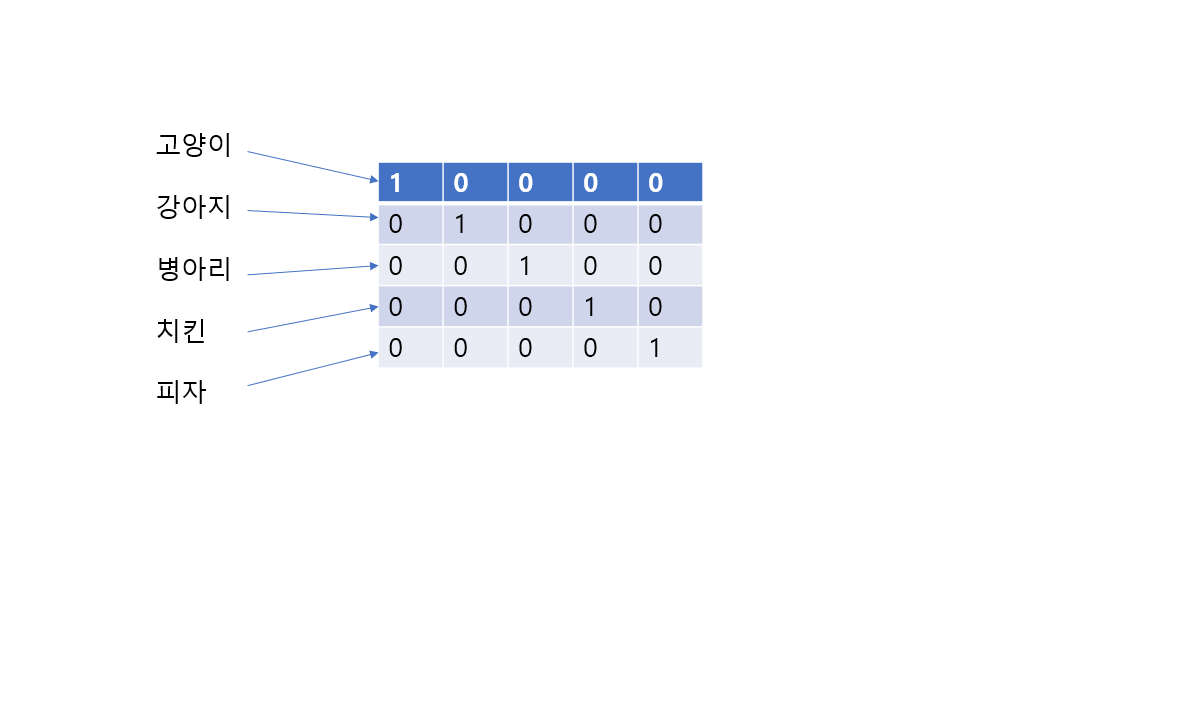
- ond-hot encoding을 통해 각 5개의 토큰이 고유의 벡터를 갖게 되었다. 사람이 보기에 5개의 토큰이 너무나도 명확하게 구분된다. 지금까지 살펴 본 백터화 방법들은 단어의 중요도나 문서 안에서의 중요도는 구분할 수 있지만 단어 사이의 유사도 구별할 수 없다.
- 이 때 사용되는 것이 Embedding 기법이며 word2vec을 비롯한 다양한 임베딩 기법들이 존재한다.
- 비슷한 의미를 내포하고 있는 토큰들은 서로 가깝게, 그렇지 않은 토큰들은 서로 멀리 뿌리도록 하는 것이 임베딩의 목적이다. 검색 시스템, 감성 분석 등에서 훌륭한 임베딩을 수행하는 것이 전체 문제 해결에 많은 영향을 준다.
- 임베딩 또한 하나의 모델을 의마하며 훈련이 필요하다. 데이터가 충분하고 시간이 많으면 소지한 데이터에 특화된 임베딩 모델을 학습시킬 수 있다. 보통은 pre_trained 임베딩 모델을 가져와서 사용한다.

In [20]:
# 1. Keras Embedding Layer
# 기본적으로 가장 쉽고 빠르게 네트워크 모델에 임베팅 층을 주입할 수 있는 방식이다. 
# 이 방법은 무작위로 특정 차원으로 입력 벡터들을 뿌린 후 학습을 통해 가중치들을 조정해나가는 방식이다.
# 즉 단어 사이의 관계를 반영하는 방법이 아니다.

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))

'\nmodel = Sequential()\nmodel.add(Embedding(vocab_size, 128, input_length=max_len))\n'

In [21]:
# 2. word2vec
# word2vec의 핵심 아이디어는 "친구를 보면 그 사람을 알 수 있다"이다. 주변 단어와의 관계를 통해 해당 단어의 의미적 특성을 파악한다. 

# word2vec embedding matrix를 keras의 embedding에 주입하는 과정
#  1. 구글에서 사전 훈련된 word2vec bin 파일 다운로드
#  2. gensim 모둘과 bin파일을 활용해 word2vec 모델 로드
import gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary = True)

In [34]:
#  3. vocabulary에 있는 토큰의 벡터를 가져와 embedding matrix에 저장
import numpy as np 

embedding_matrix = np.zeros((vocab_size, 300))

for index, word in enumerate(vocabulary):
    if word in word2vec:
        embedding_vector = word2vec[word]
        embedding_matrix[index] = embedding_vector
    else:
        print("word2vec에 없는 단어입니다.")
        break
    

word2vec에 없는 단어입니다.


In [ ]:
# 4. keras embedding layer에 embedding matrix를 가중치로 주어 